# Music Generation RNN
This jupyter notebook covers the whole data pipeline and goes through multiple experiments to reflect on our achievements and learnings during the development process.

## Setup
This section installs and imports the required libraries.

In [5]:
!pip install pretty-midi
!sudo apt install -y fluidsynth
!pip install --upgrade pyfluidsynth
;

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import src.models.basic_rnn as brnn
from src.utils.visualization import plot_piano_roll, plot_histories

## Experiments
Our data pre-processing is handled by the different experiment classes as some of them require differ inputs which we have continuosly improved during our research and development. 

### Experiment 1 - Tensorflow Tutorial
The modle provided by the Tensorflow tutorial is very different from the other models and the model in the paper by Daniel Johnson because it does not use the a beat-wise structure. Instead it utilizes the time stamps of each note. While this simplifies the data processing, the generated music is not very complex. Link to model: https://www.tensorflow.org/tutorials/audio/music_generation

- Input: The data is in a dictonary of the form \["pitch", "step", "duration"\]
- Model: 1 LSTM layer (128) and one Dense layer without activation. 
    - Optimizer: Adam
    - Loss: SparseCategoricalLoss
- Output: Predicts pitch, step, and duration at the same time

Experiment 1:
in get_model self is <src.models.basic_rnn.RNNMusicExperimentSix object at 0x7eff081708d0>
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 25, 3)]      0                                            
__________________________________________________________________________________________________
lstm_6 (LSTM)                   (None, 128)          67584       input_3[0][0]                    
__________________________________________________________________________________________________
duration (Dense)                (None, 1)            129         lstm_6[0][0]                     
__________________________________________________________________________________________________
pitch (Dense)                   (None, 128)          16512       lstm_6[0][0]           

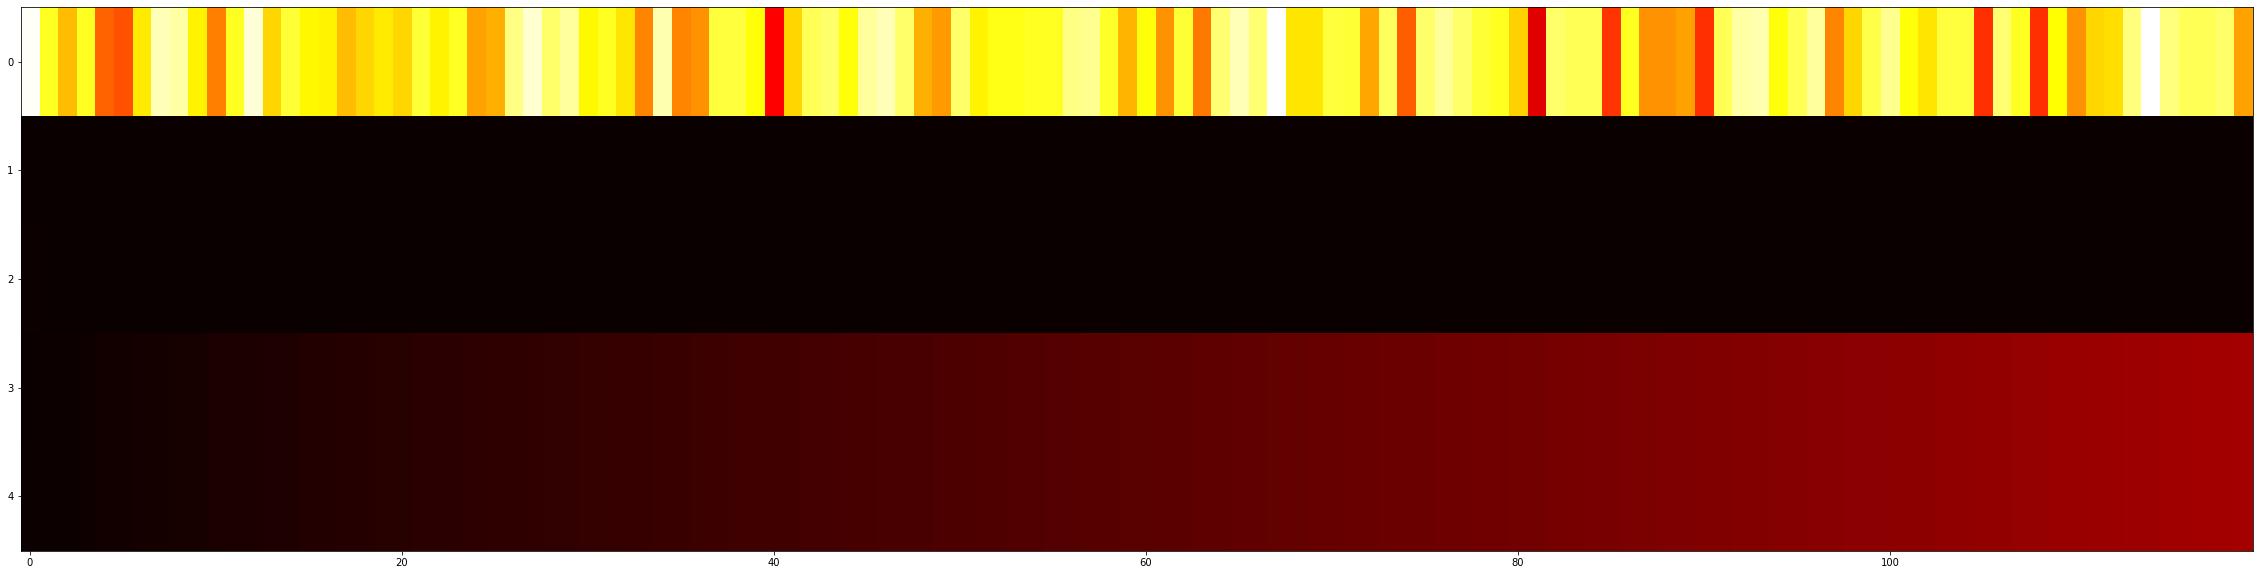

In [7]:
print("Experiment 1:")
exp1 = brnn.RNNMusicExperimentSix(
    learning_rate=0.005,
    epochs=1,
    batch_size=64,
    num_music_files=5,
    sequence_length=25,
)
exp1.run()

In [8]:
#TODO: Fix graph
#TODO: Display Audio

#### Analysis:
# TODO: ADD TEXT

### Experiment 2 - [NAME]
#TODO: Explanation

- Input: The data is in shape (260 x seq_length) - 260 being 128 notes + 128 articulations + 4 beats
- Model: 4 LSTM layers (256) and one Dense layer without relu activation. 
    - Optimizer: Adam
    - Loss: CategoricalCrossEntropy
- Output: Predicts the next timesteps, i.e. which notes are played at the next beat.

In [9]:
print("Experiment 2:")
exp2 = brnn.RNNMusicExperimentOne(
    learning_rate=0.005,
    epochs=10,
    batch_size=64,
    num_music_files=5,
    sequence_length=25,
)
exp2.run()

Experiment 2:
in get model
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 25, 260)]         0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 25, 256)           529408    
_________________________________________________________________
lstm_8 (LSTM)                (None, 25, 256)           525312    
_________________________________________________________________
lstm_9 (LSTM)                (None, 25, 256)           525312    
_________________________________________________________________
lstm_10 (LSTM)               (None, 256)               525312    
_________________________________________________________________
pitch (Dense)                (None, 256)               65792     
Total params: 2,171,136
Trainable params: 2,171,136
Non-trainable params: 0
______________________

ValueError: in user code:

    /home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:274 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer model_1: expected shape=(None, 25, 260), found shape=(64, 15, 25780)


### Experiment 3 - [NAME]

In [10]:
print("Experiment 3")
exp3 = brnn.RNNMusicExperimentTwo(
    sequence_length=15,
    learning_rate=0.001,
    epochs=1,
)
exp3.run()

Experiment 3


AttributeError: 'list' object has no attribute 'shape'

### Experiment 4 - [NAME]

Experiment 4
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 128, 50)           15800     
_________________________________________________________________
lstm_16 (LSTM)               (None, 128, 50)           20200     
_________________________________________________________________
lstm_17 (LSTM)               (None, 128, 50)           20200     
_________________________________________________________________
dense_2 (Dense)              (None, 128, 2)            102       
Total params: 56,302
Trainable params: 56,302
Non-trainable params: 0
_________________________________________________________________
Training...
1823/1823 [==============================] - 22s 11ms/step - loss: 0.0843 - mse: 0.0203
Predicting data...
Saving data...


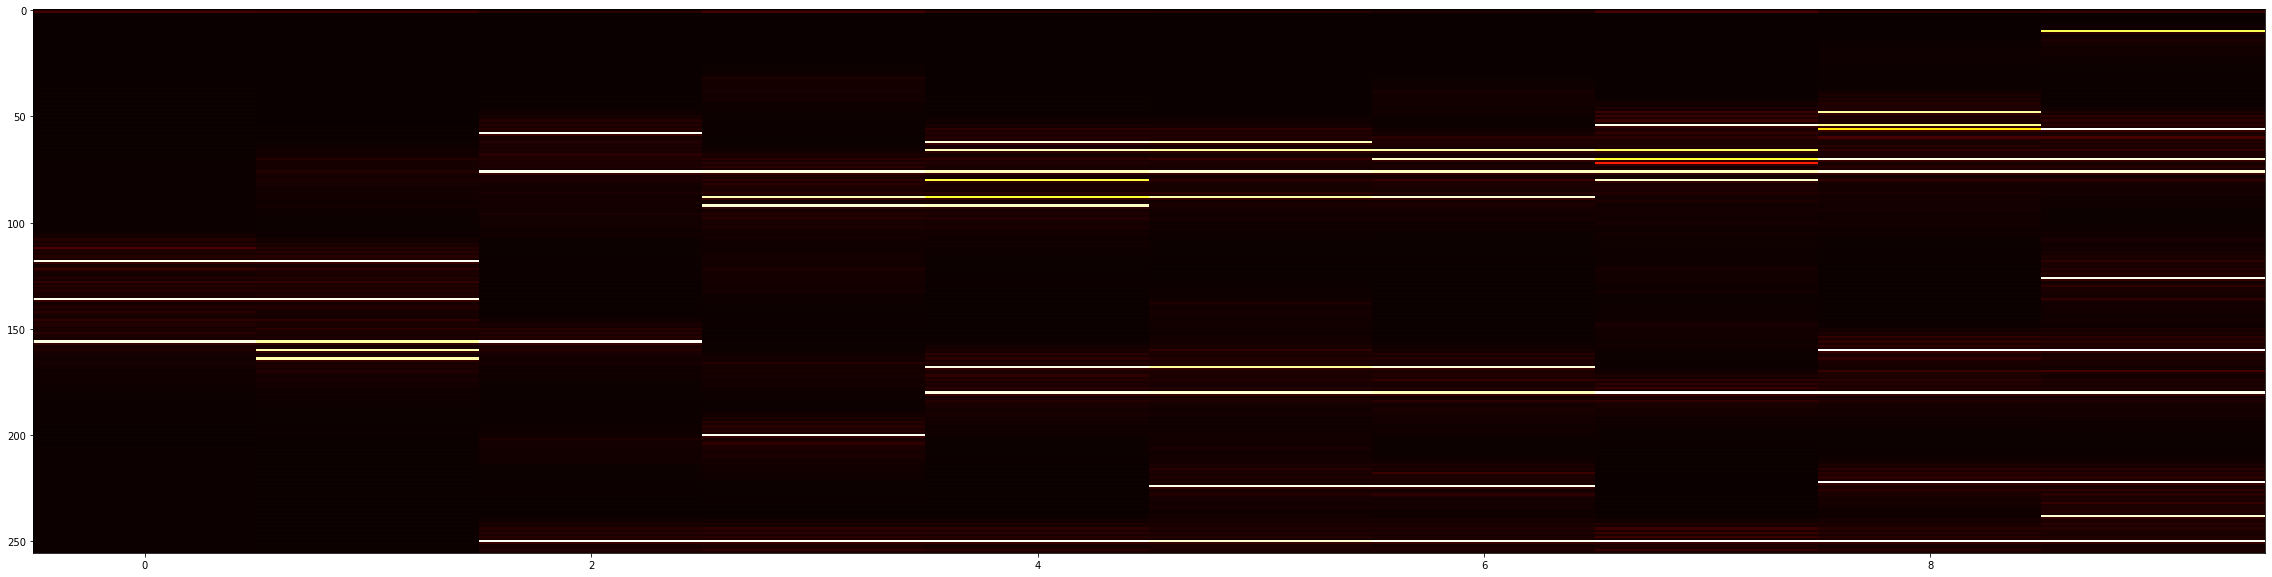

In [11]:
print("Experiment 4")
exp4 = brnn.RNNMusicExperimentThree(
    sequence_length=15,
    learning_rate=0.001,
    epochs=1,
    batch_size=1,
    num_music_files=1,
)
exp4.run()

### Experiment 5 - [NAME]

Experiment 5
in get_model self is <src.models.basic_rnn.RNNMusicExperimentFour object at 0x7efef618ed30>
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 128, 50)           20800     
_________________________________________________________________
lstm_19 (LSTM)               (None, 128, 50)           20200     
_________________________________________________________________
lstm_20 (LSTM)               (None, 128, 50)           20200     
_________________________________________________________________
dense_3 (Dense)              (None, 128, 2)            102       
Total params: 61,302
Trainable params: 61,302
Non-trainable params: 0
_________________________________________________________________
Training...
1823/1823 [==============================] - 22s 11ms/step - loss: 0.0530 - mse: 0.0108
Predicting data...
Saving data...


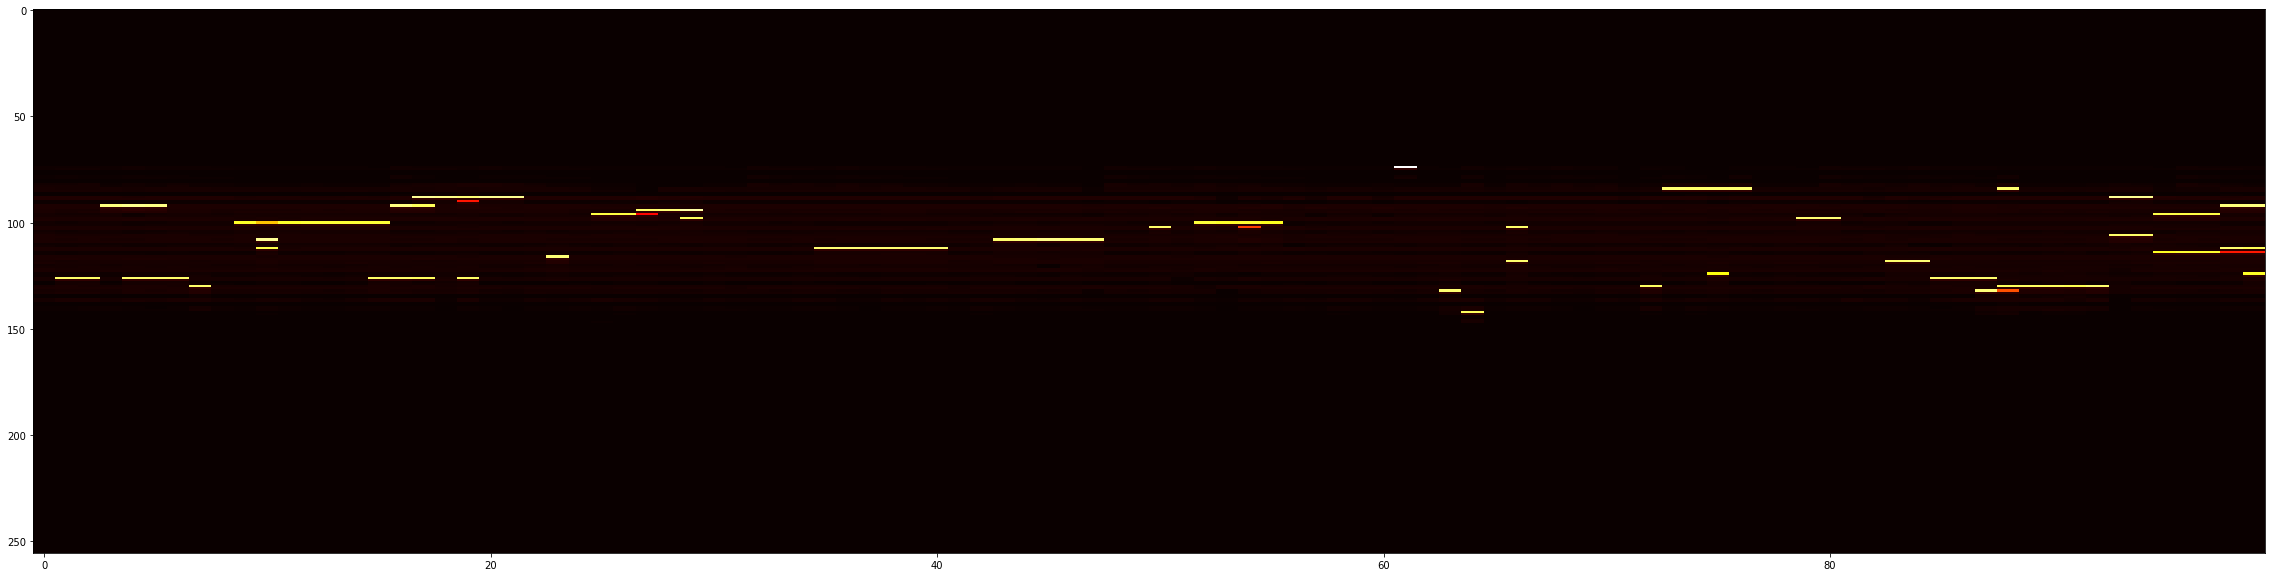

In [12]:
print("Experiment 5")
exp5 = brnn.RNNMusicExperimentFour(
    sequence_length=15,
    learning_rate=0.01,
    epochs=1,
    batch_size=1,
    num_music_files=1
)
exp5.run()

### Experiment 6 - [NAME]

Experiment 6
in get_model self is <src.models.basic_rnn.RNNMusicExperimentFive object at 0x7efef49e4da0>
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 128, 50)           20800     
_________________________________________________________________
lstm_22 (LSTM)               (None, 128, 50)           20200     
_________________________________________________________________
lstm_23 (LSTM)               (None, 128, 50)           20200     
_________________________________________________________________
dense_4 (Dense)              (None, 128, 2)            102       
Total params: 61,302
Trainable params: 61,302
Non-trainable params: 0
_________________________________________________________________


/home/ecbm4040/envTF24/lib/python3.6/site-packages/pretty_midi/pretty_midi.py:101: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


Training...
1206/1206 [==============================] - 16s 11ms/step - loss: 0.0752 - mse: 0.0170
Predicting data...
Saving data...


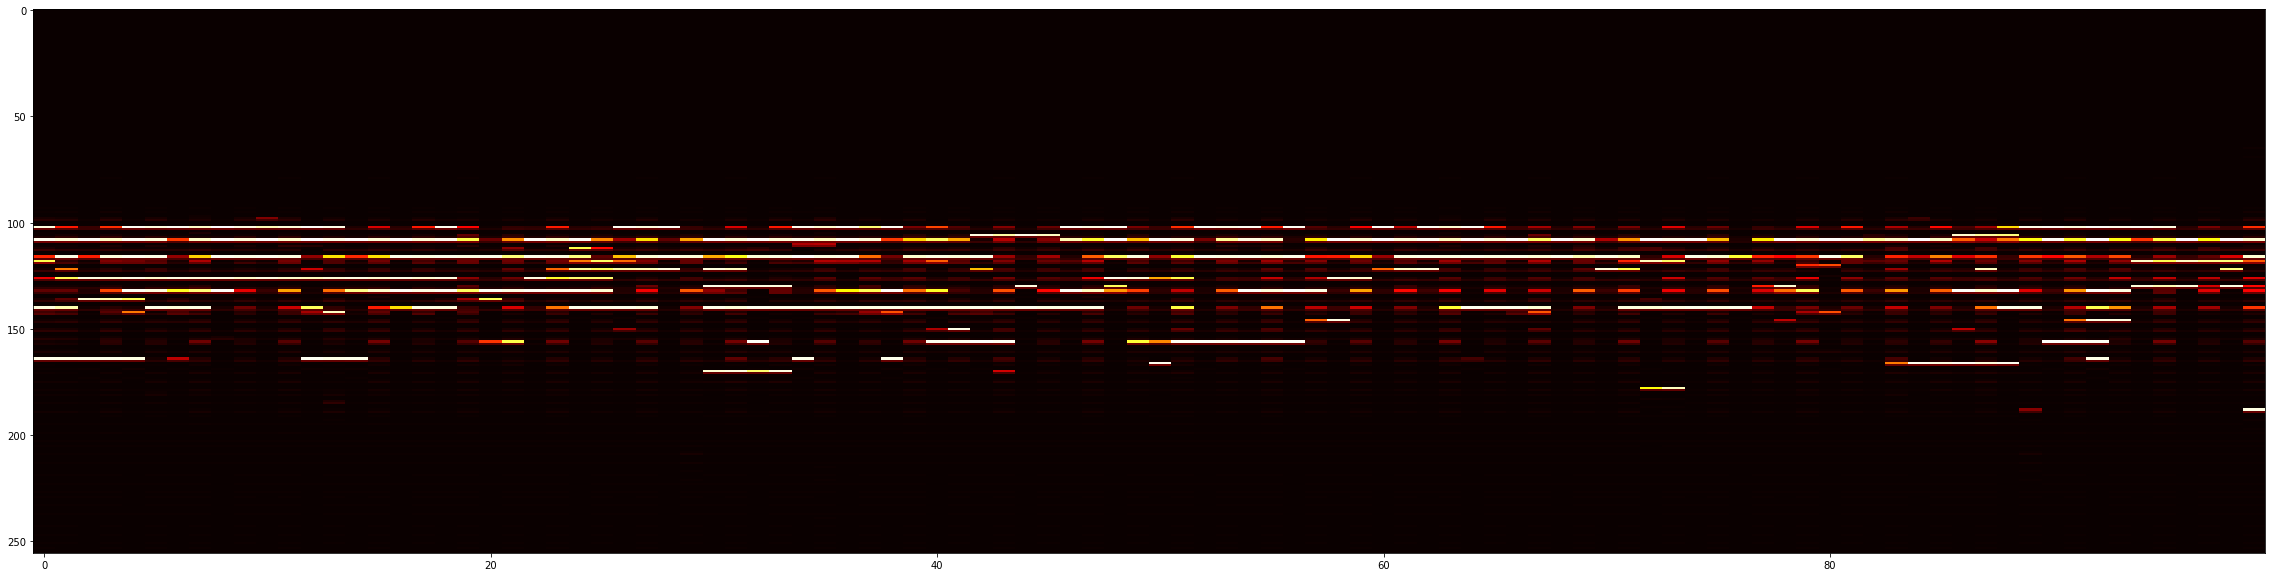

In [13]:
print("Experiment 6")
exp6 = brnn.RNNMusicExperimentFive(
    sequence_length=15,
    learning_rate=0.01,
    epochs=1,
    batch_size=1,
    num_music_files=1
)
exp6.run()

## Evaluation of Different Models

In [15]:
histories = []
history_labels = []
parameter = "loss"

histories.append(exp1.get_history())
# histories.append(exp2.get_history())
# histories.append(exp3.get_history())
histories.append(exp4.get_history())
histories.append(exp5.get_history())
histories.append(exp6.get_history())

history_labels.append("exp1")
# history_labels.append("exp2")
# history_labels.append("exp3")
history_labels.append("exp4")
history_labels.append("exp5")
history_labels.append("exp6")

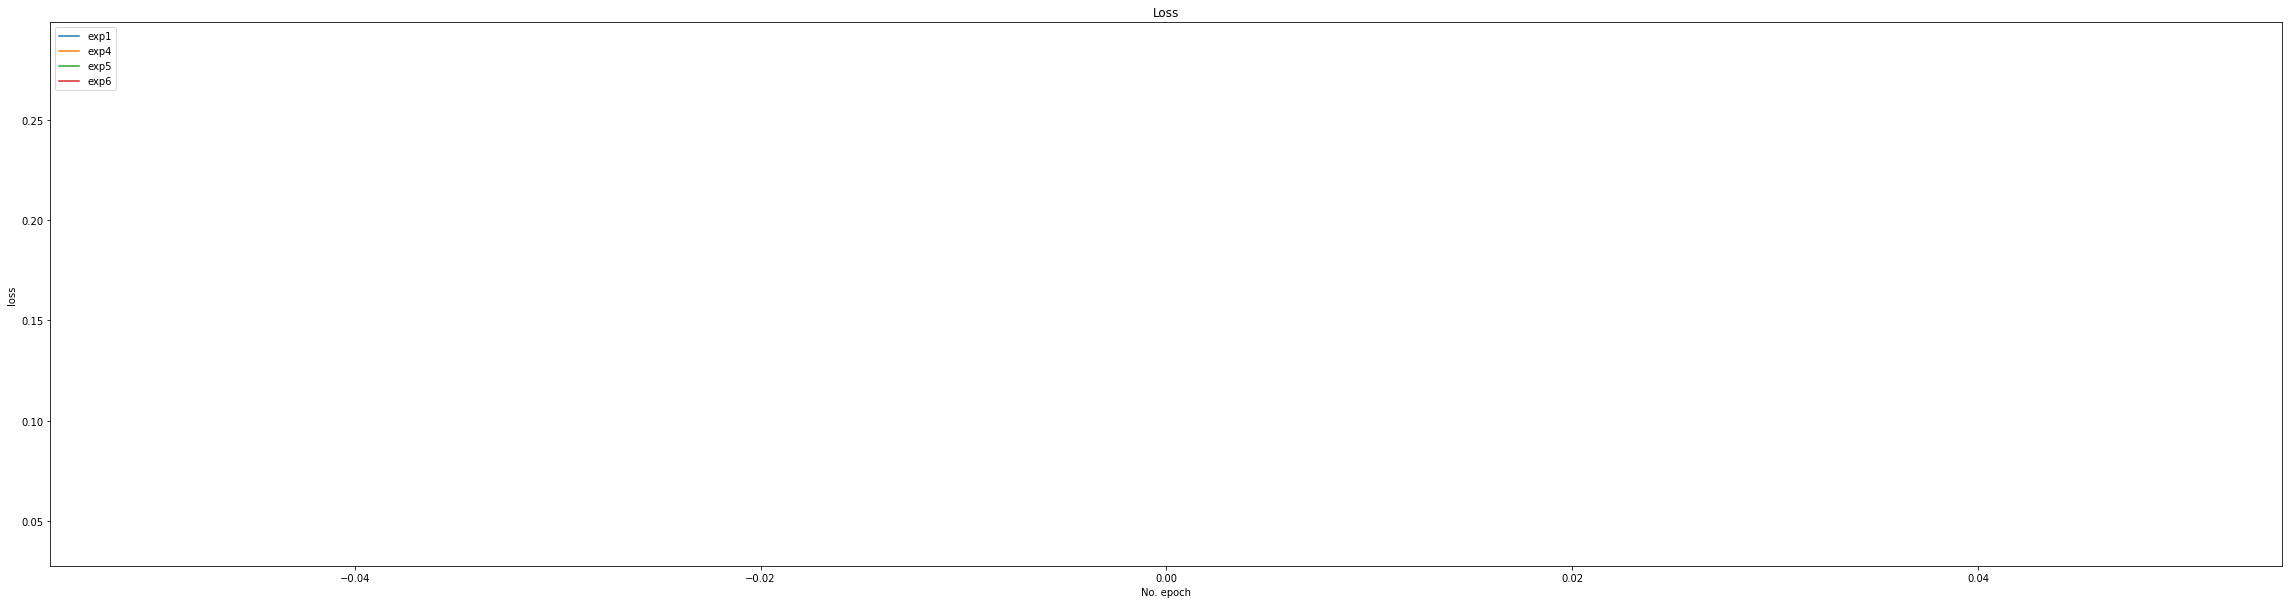

In [16]:
plot_histories(histories, history_labels, parameter)

In [ ]:
#TODO: Predict 30s with each experiment
#TODO: Implement function for RNNExperiment to turn prediction into midi_file
#TODO: Write getter function for output pretty midi of RNNExperiment
#TODO: Plot graph with all models
#TODO: Have predicted music files from each (optional)
#TODO: Write paragraph about what effect each change has